In [1]:
# Este colab forma parte del video de Redes Neuronales Convolucionales del canal de Youtube "Ringa Tech"
# https://youtu.be/eGDSlW93Bng
import tensorflow as tf
import tensorflow_datasets as tfds

#Descargar set de datos de MNIST (Numeros escritos a mano, etiquetados)
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

#Obtener en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

#Funcion de normalizacion para los datos (Pasar valor de los pixeles de 0-255 a 0-1)
#(Hace que la red aprenda mejor y mas rapido)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui se pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)
ds=datos_pruebas
#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()
d=datos_pruebas
clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


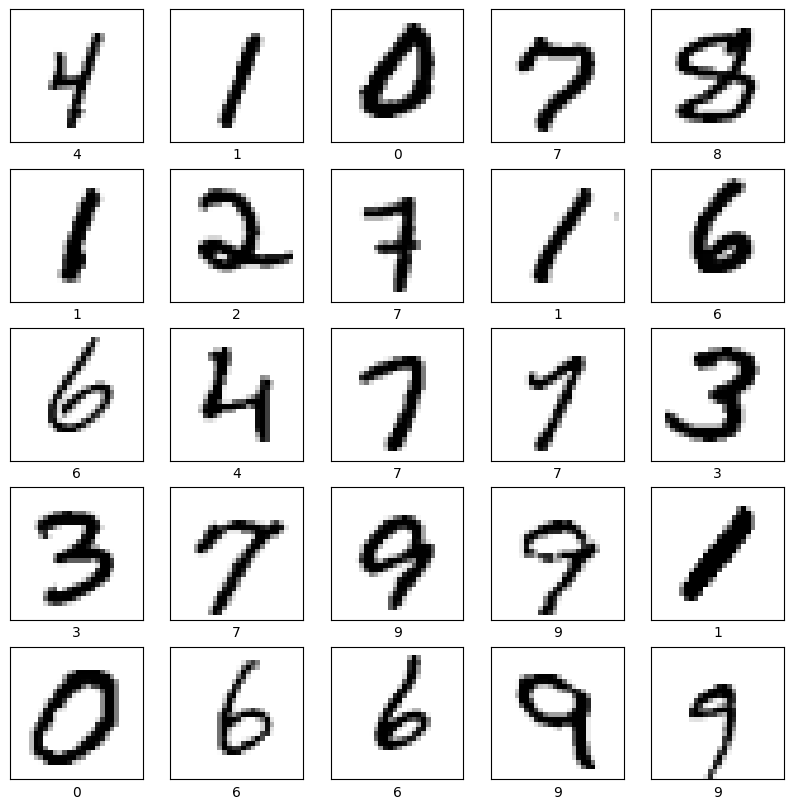

In [2]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show()  

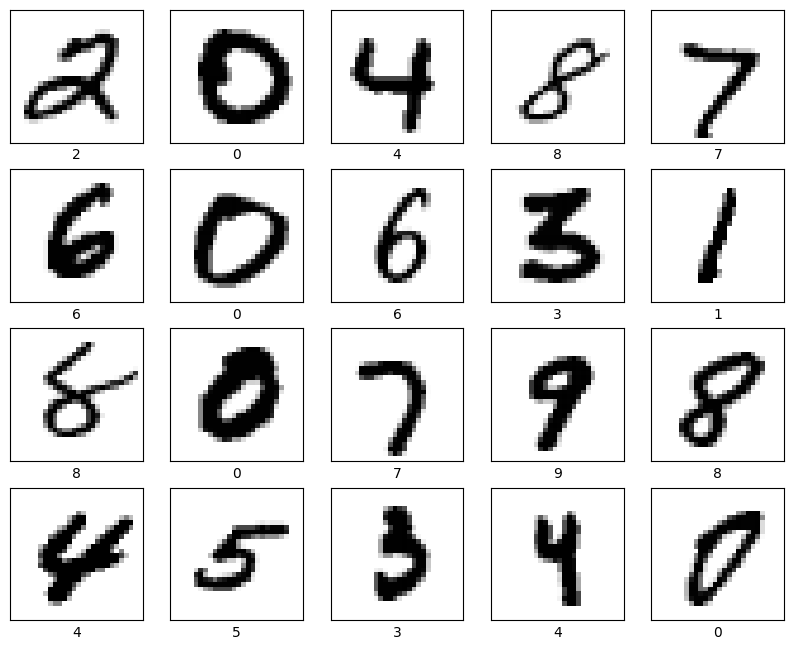

In [3]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(d.take(20)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show() 

In [4]:
#Crear el modelo (Modelo denso, regular, sin redes convolucionales todavia)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 = blanco y negro
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [5]:
#Los numeros de datos de entrenamiento y pruebas (60k y 10k)
num_datos_entrenamiento = metadatos.splits["train"].num_examples
num_datos_pruebas = metadatos.splits["test"].num_examples

#Trabajar por lotes
TAMANO_LOTE=32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [6]:
#Realizar el entrenamiento
import math

historial = modelo.fit(
    datos_entrenamiento,
    epochs=350,
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE)
)

Epoch 1/350
1875/1875 [==============================] - 22s 3ms/step - loss: 0.7332 - accuracy: 0.7964
Epoch 2/350
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3098 - accuracy: 0.9109
Epoch 3/350
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2600 - accuracy: 0.9239
Epoch 4/350
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2253 - accuracy: 0.9354
Epoch 5/350
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2098 - accuracy: 0.9396
Epoch 6/350
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1933 - accuracy: 0.9442
Epoch 7/350
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1741 - accuracy: 0.9496
Epoch 8/350
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1613 - accuracy: 0.9527
Epoch 9/350
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1519 - accuracy: 0.9560
Epoch 10/350
1875/1875 [==============================] - 7s 4ms/step - 

In [7]:
#Exportar el modelo al explorador! 
modelo.save('numnu.h5')



In [8]:
predictions = modelo.predict(datos_pruebas.take(50))


50/50 [==============================] - 0s 4ms/step


In [9]:
sw=predictions[0]


In [10]:
sw

array([2.0518418e-24, 2.6595028e-20, 1.0000000e+00, 2.2961994e-18,
       1.5199822e-20, 3.5518633e-28, 8.0443759e-21, 8.8237311e-22,
       5.5070155e-14, 1.7109102e-30], dtype=float32)

In [11]:
a = sw.argmax()

In [12]:
a

2

In [13]:
predictions.shape

(1600, 10)

In [14]:
sw1=predictions[13]


In [15]:
a = sw1.argmax()

In [16]:
a

9

#Busca en internet la imagen de un numero. Tratalo y predice cual es.

In [17]:
from PIL import Image

In [18]:
import numpy as np

In [25]:
img2 = Image.open('0.jpg')

In [26]:
entrada1 = (np.expand_dims(img2, 0))



In [27]:
predicciond = modelo.predict(entrada1)
print(predicciond)
pty= predicciond.argmax()
print(pty)

1/1 [==============================] - 0s 97ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


In [28]:
img2 = Image.open('1.jpg')

In [29]:
entrada1 = (np.expand_dims(img2, 0))



In [30]:
predicciond = modelo.predict(entrada1)
print(predicciond)
pty= predicciond.argmax()
print(pty)

1/1 [==============================] - 0s 27ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1


In [31]:
img2 = Image.open('2.jpg')

In [32]:
entrada1 = (np.expand_dims(img2, 0))



In [33]:
predicciond = modelo.predict(entrada1)
print(predicciond)
pty= predicciond.argmax()
print(pty)

1/1 [==============================] - 0s 24ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
2


In [34]:
img2 = Image.open('3.jpg')

In [35]:
entrada1 = (np.expand_dims(img2, 0))



In [36]:
predicciond = modelo.predict(entrada1)
print(predicciond)
pty= predicciond.argmax()
print(pty)

1/1 [==============================] - 0s 23ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
3


In [37]:
img2 = Image.open('4.jpg')

In [38]:
entrada1 = (np.expand_dims(img2, 0))



In [39]:
predicciond = modelo.predict(entrada1)
print(predicciond)
pty= predicciond.argmax()
print(pty)

1/1 [==============================] - 0s 45ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
4


In [40]:
img2 = Image.open('5.jpg')

In [41]:
entrada1 = (np.expand_dims(img2, 0))



In [42]:
predicciond = modelo.predict(entrada1)
print(predicciond)
pty= predicciond.argmax()
print(pty)

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
5


In [43]:
img2 = Image.open('6.jpg')

In [44]:
entrada1 = (np.expand_dims(img2, 0))



In [45]:
predicciond = modelo.predict(entrada1)
print(predicciond)
pty= predicciond.argmax()
print(pty)

1/1 [==============================] - 0s 23ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
6


In [46]:
img2 = Image.open('7.jpg')

In [47]:
entrada1 = (np.expand_dims(img2, 0))



In [48]:
predicciond = modelo.predict(entrada1)
print(predicciond)
pty= predicciond.argmax()
print(pty)

1/1 [==============================] - 0s 24ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
7


In [49]:
img2 = Image.open('8.jpg')

In [50]:
entrada1 = (np.expand_dims(img2, 0))



In [51]:
predicciond = modelo.predict(entrada1)
print(predicciond)
pty= predicciond.argmax()
print(pty)

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8


In [52]:
img2 = Image.open('9.jpg')

In [53]:
entrada1 = (np.expand_dims(img2, 0))



In [54]:
predicciond = modelo.predict(entrada1)
print(predicciond)
pty= predicciond.argmax()
print(pty)

1/1 [==============================] - 0s 33ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
4
